In [25]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

In [2]:
 pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [27]:
import pandas_datareader as pdr

In [28]:
from datetime import datetime

In [29]:
#Let's use Yahoo and pandas to grab some data for some tech stocks.

# The tech stocks we'll use for this analysis
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [30]:
# Set up End and Start times for data grab
end=datetime.now()

start=datetime(end.year-1,end.month,end.day)

In [31]:
#For loop for grabing yahoo finance data and setting as a dataframe
for stock in tech_list:
     globals()[stock] = pdr.get_data_yahoo(stock,start,end)
    

In [32]:
AAPL.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-07-18,151.570007,146.699997,150.740005,147.070007,81420900.0,147.070007
2022-07-19,151.229996,146.910004,147.919998,151.000000,82982400.0,151.000000
2022-07-20,153.720001,150.369995,151.119995,153.039993,64823400.0,153.039993
2022-07-21,155.570007,151.940002,154.500000,155.350006,65086600.0,155.350006
2022-07-22,156.279999,153.410004,155.389999,154.089996,66625400.0,154.089996


In [33]:
GOOG.describe()

,High,Low,Open,Close,Volume,Adj Close
count,251.000000,251.000000,251.000000,251.000000,2.510000e+02,251.000000
mean,134.835307,131.714184,133.340047,133.233932,2.722103e+07,133.233932
std,12.310599,12.759916,12.668231,12.531744,1.069859e+07,12.531744
min,106.394997,102.208000,105.141998,105.839500,1.186600e+07,105.839500
25%,127.082005,121.901901,125.000000,124.093750,1.942800e+07,124.093750
50%,138.399506,135.789001,137.115494,137.004501,2.477800e+07,137.004501
75%,144.324753,141.738251,143.246254,142.804497,3.222100e+07,142.804497
max,152.100006,149.887497,151.863495,150.709000,8.975000e+07,150.709000


In [34]:
AMZN.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2021-07-26 to 2022-07-22
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       251 non-null    float64
 1   Low        251 non-null    float64
 2   Open       251 non-null    float64
 3   Close      251 non-null    float64
 4   Volume     251 non-null    float64
 5   Adj Close  251 non-null    float64
dtypes: float64(6)
memory usage: 13.7 KB


<AxesSubplot:xlabel='Date'>

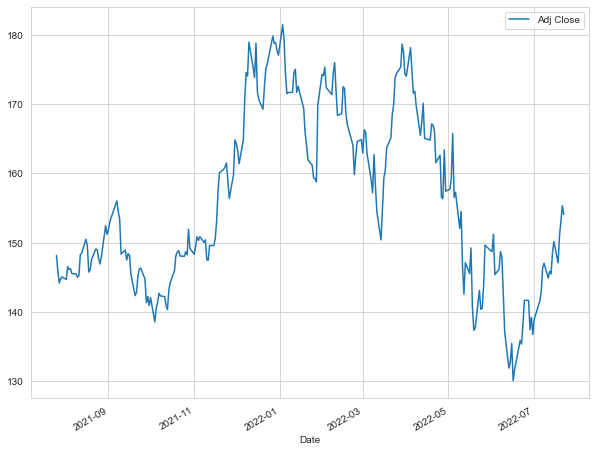

In [35]:
AAPL['Adj Close'].plot(legend=True,figsize=(10,8))

<AxesSubplot:xlabel='Date'>

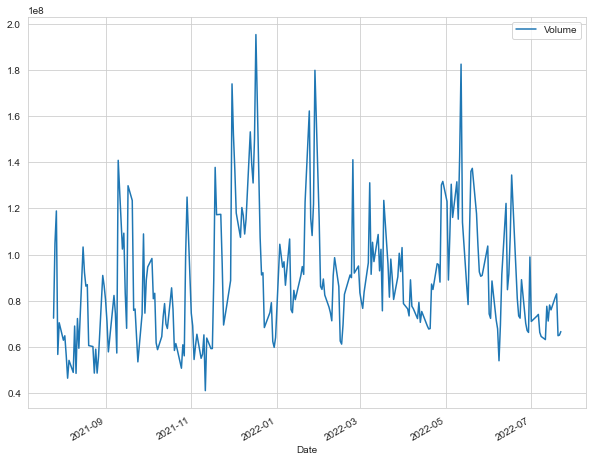

In [37]:
AAPL['Volume'].plot(legend=True,figsize=(10,8))

In [14]:
# Part 2 - MOVING AVERAGES & DAILY RETURN

In [15]:
#Now that we've seen the visualizations for the closing price and the volume traded each day,
#let's go ahead and caculate the moving average for the stock.

# Luckily pandas has a built-in rolling mean calculator

# Let's go ahead and plot out several moving averages


In [38]:
ma_day=[21,55,100]

for ma in ma_day:
    column_name="MA for %s days"%(str(ma))
    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()



In [39]:
AAPL

,High,Low,Open,Close,Volume,Adj Close,MA for 21 days,MA for 55 days,MA for 100 days
Date,,,,,,,,,
2021-07-26,149.830002,147.699997,148.270004,148.990005,72434100.0,148.143616,NaN,NaN,NaN
2021-07-27,149.210007,145.550003,149.119995,146.770004,104818600.0,145.936234,NaN,NaN,NaN
2021-07-28,146.970001,142.539993,144.809998,144.979996,118931200.0,144.156387,NaN,NaN,NaN
2021-07-29,146.550003,144.580002,144.690002,145.639999,56699500.0,144.812653,NaN,NaN,NaN
2021-07-30,146.330002,144.110001,144.380005,145.860001,70440600.0,145.031403,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2022-07-18,151.570007,146.699997,150.740005,147.070007,81420900.0,147.070007,141.264286,144.934897,154.305100
2022-07-19,151.229996,146.910004,147.919998,151.000000,82982400.0,151.000000,142.261429,144.709444,154.216749
2022-07-20,153.720001,150.369995,151.119995,153.039993,64823400.0,153.039993,143.284286,144.629831,154.122136


<AxesSubplot:xlabel='Date'>

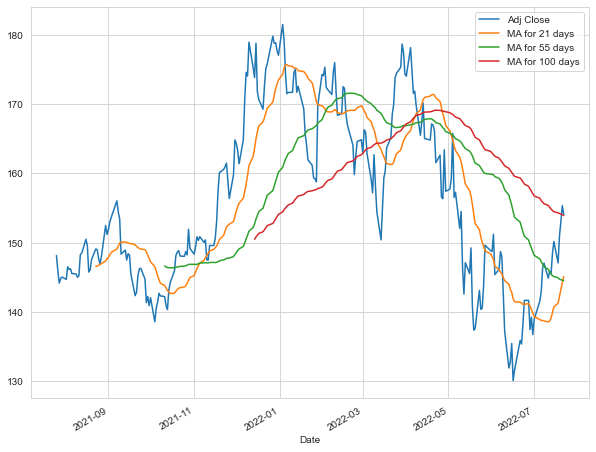

In [40]:
#Now let's go ahead and plot all the additional Moving Averages

AAPL[['Adj Close','MA for 21 days','MA for 55 days','MA for 100 days']].plot(subplots=False,figsize=(10,8))

In [13]:
#Section 2 - Daily Return Analysis

#Now that we've done some baseline analysis, let's go ahead and dive a little deeper. 
#We're now going to analyze the risk of the stock. In order to do so we'll need to take a
#closer look at the daily changes of the stock,
#and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns for the Apple stock.

In [41]:
# We'll use pct_change to find the percent change for each day
AAPL['Daily Return']=AAPL['Adj Close'].pct_change()

In [19]:
AAPL.head(15) # to see the daily return column

,High,Low,Open,Close,Volume,Adj Close,MA for 21 days,MA for 55 days,MA for 100 days,Daily Return
Date,,,,,,,,,,
2021-07-20,147.100006,142.960007,143.460007,146.149994,96350000.0,145.319748,NaN,NaN,NaN,NaN
2021-07-21,146.130005,144.630005,145.529999,145.399994,74993500.0,144.574005,NaN,NaN,NaN,-0.005132
2021-07-22,148.199997,145.809998,145.940002,146.800003,77338200.0,145.966049,NaN,NaN,NaN,0.009629
2021-07-23,148.720001,146.919998,147.550003,148.559998,71447400.0,147.716049,NaN,NaN,NaN,0.011989
2021-07-26,149.830002,147.699997,148.270004,148.990005,72434100.0,148.143616,NaN,NaN,NaN,0.002895
2021-07-27,149.210007,145.550003,149.119995,146.770004,104818600.0,145.936234,NaN,NaN,NaN,-0.014900
2021-07-28,146.970001,142.539993,144.809998,144.979996,118931200.0,144.156387,NaN,NaN,NaN,-0.012196
2021-07-29,146.550003,144.580002,144.690002,145.639999,56699500.0,144.812653,NaN,NaN,NaN,0.004552
2021-07-30,146.330002,144.110001,144.380005,145.860001,70440600.0,145.031387,NaN,NaN,NaN,0.001510


<AxesSubplot:xlabel='Date'>

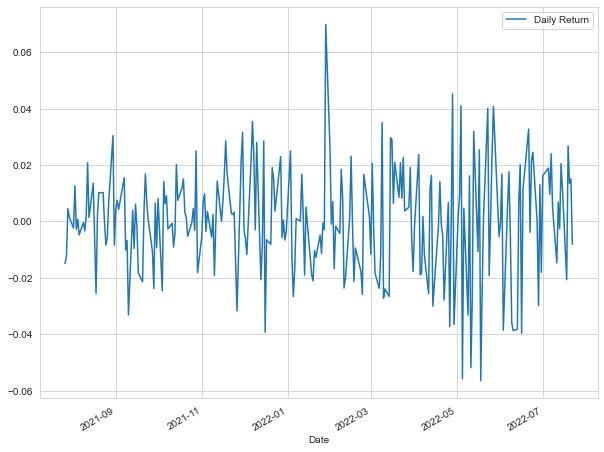

In [42]:
# Then we'll plot the daily return percentage
AAPL['Daily Return'].plot(figsize=(10,8),legend=True)

<AxesSubplot:xlabel='Date'>

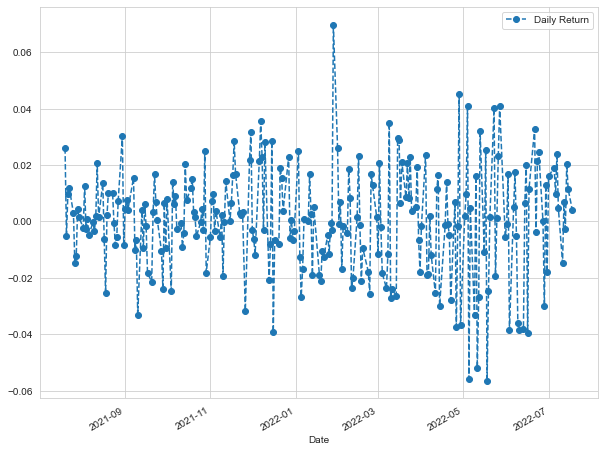

In [23]:
AAPL['Daily Return'].plot(figsize=(10,8),legend=True,linestyle='--',marker='o')

In [24]:
#Great, now let's get an overall look at the average daily return using a histogram. 
#We'll use seaborn to create both a histogram and kde plot on the same figure.

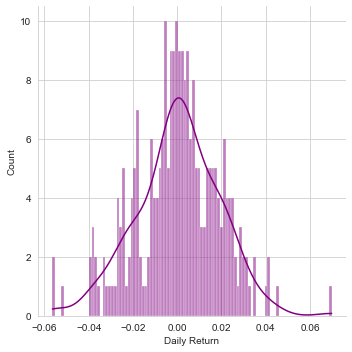

In [43]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
sns.displot(AAPL['Daily Return'].dropna(),bins=100,color='purple',kde=True)

<AxesSubplot:>

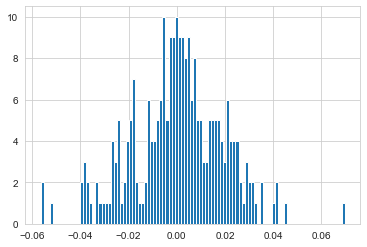

In [44]:
# We can also see daily return by using pandas in more simple way in histogram
AAPL['Daily Return'].hist(bins=100)


In [27]:
#Now what if we wanted to analyze the returns of all the stocks in our list? 
#Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes

In [46]:
# Grab all the closing prices for the tech stock list into one DataFrame
#Easy and shortcut meathod
closing_df=pdr.get_data_yahoo(['AAPL','GOOG','MSFT','AMZN'],start,end)['Adj Close']

In [47]:
closing_df

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-07-26,148.143631,139.644501,286.708832,184.990997
2021-07-27,145.936249,136.796494,284.219208,181.319504
2021-07-28,144.156387,136.381500,283.901764,181.516006
2021-07-29,144.812637,136.540497,284.179504,179.996002
2021-07-30,145.031387,135.220993,282.602386,166.379501
...,...,...,...,...
2022-07-18,147.070007,109.910004,254.250000,113.760002
2022-07-19,151.000000,114.620003,259.529999,118.209999
2022-07-20,153.039993,114.699997,262.269989,122.769997


In [48]:
#Now that we have all the closing prices, let's go ahead and get the daily return for all the stocks,
#like we did for the Apple stock.

# Make a new tech returns DataFrame
tech_rets=closing_df.pct_change()

In [31]:
tech_rets #this are the percent change of all stocks

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-07-19,NaN,NaN,NaN,NaN
2021-07-20,0.025974,0.014294,0.008339,0.006649
2021-07-21,-0.005132,0.011434,0.007447,0.003361
2021-07-22,0.009629,0.005490,0.016844,0.014736
2021-07-23,0.011989,0.033657,0.012337,0.005115
...,...,...,...,...
2022-07-12,0.006834,-0.014358,-0.040981,-0.022640
2022-07-13,-0.002537,-0.023183,-0.003745,0.010804
2022-07-14,0.020482,-0.006658,0.005381,0.002083


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


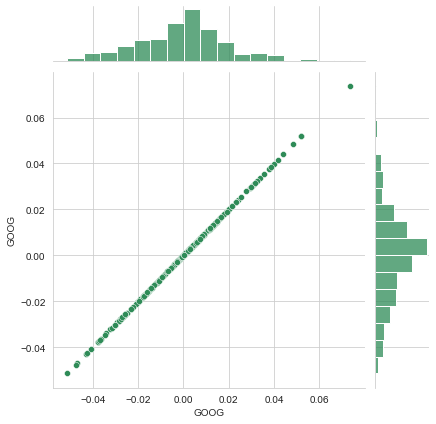

In [32]:
#Now we can compare the daily percentage return of two stocks to check how correlated.
#First let's see a sotck compared to itself.

# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')

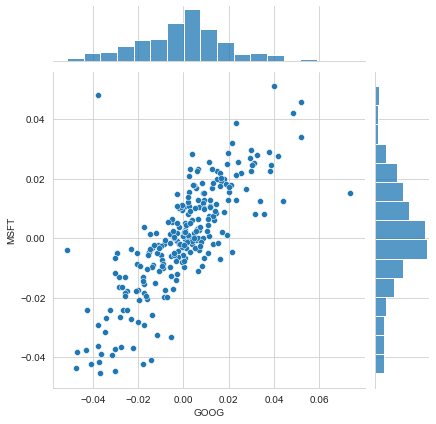

In [33]:
#So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its 
#daily return values should occur. So let's go ahead and compare Google and Microsoft the same way.

# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x="GOOG",y="MSFT",data=tech_rets,kind='scatter')

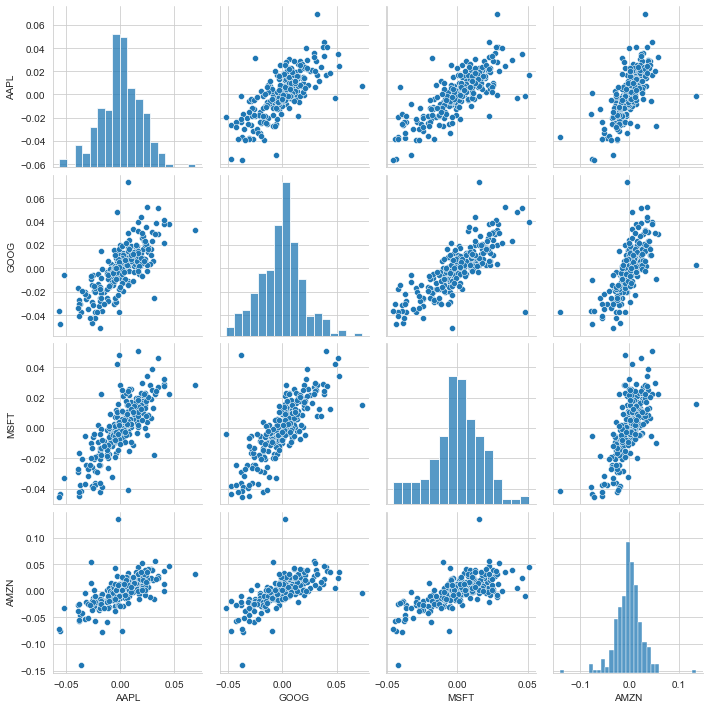

In [34]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis of all the comparisons
sns.pairplot(data=tech_rets,dropna=True)

In [35]:
#Above we can see all the relationships on daily returns between all the stocks.
#A quick glance shows an interesting correlation between Google and Amazon daily returns.
#It might be interesting to investigate that individual comaprison. While the simplicity of just calling sns.pairplot() is 
#fantastic we can also use sns.PairGrid() for full control of the figure, including what kind of plots go in the diagonal,
#the upper triangle,and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this
#result.

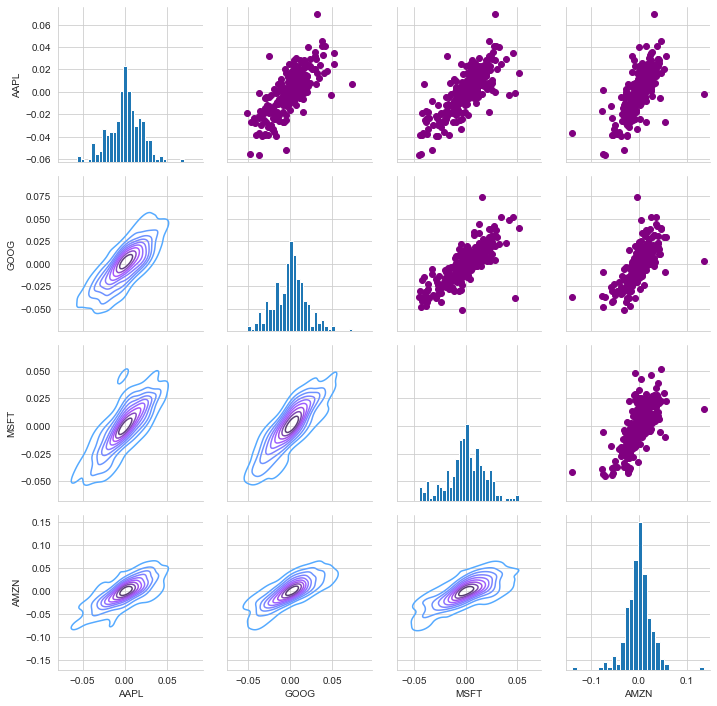

In [36]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig=sns.PairGrid(data=tech_rets,dropna=True)

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter,color='purple')


# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot,cmap="cool_d")

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist,bins=30)

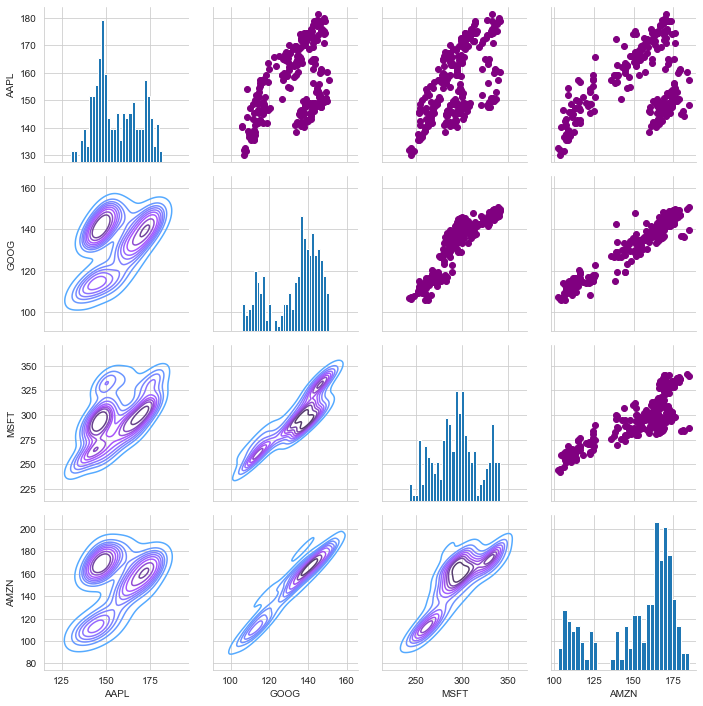

In [49]:
#Same but here we plot the CLOSING PRICE
return_fig=sns.PairGrid(data=closing_df,dropna=True)

return_fig.map_upper(plt.scatter,color='purple')


return_fig.map_lower(sns.kdeplot,cmap="cool_d")

return_fig.map_diag(plt.hist,bins=30)

In [38]:
# Google and microsoft has a strong correlation

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

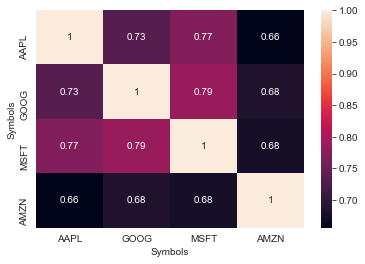

In [39]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.heatmap(data = tech_rets.corr(), annot=True)

Google and microsoft has a strong correlation of 0.79

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

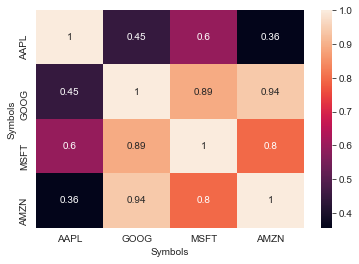

In [40]:
sns.heatmap(data = closing_df.corr(), annot=True)

 here on closing price we can see the strong correlation between this two stocks
google and microsoft 0.86
google and amazon 0.82

In [41]:
#Risk Analysis

#There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by
#comparing the expected return with the standard deviation of the daily returns.

In [50]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal tech_rets DataFrame
rets=tech_rets.dropna()


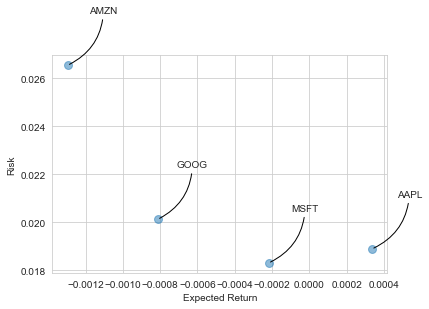

In [51]:
area=np.pi*20
#Making the circle of scatteer plot bigger otherwise we get a tiny little dots

plt.scatter(rets.mean(),rets.std(),alpha=0.5,s=area)

#Setting the plot axis title
plt.xlabel('Expected Return')
plt.ylabel('Risk')


# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
#         arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))
        arrowprops = dict(arrowstyle = '-', color='black', connectionstyle = 'arc3, rad= -.3'))

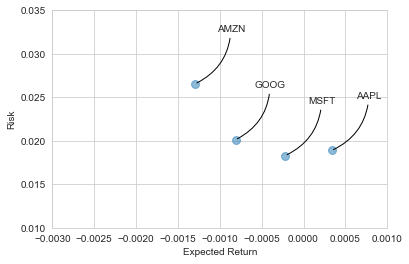

In [52]:
plt.scatter(rets.mean(),rets.std(),alpha=0.5,s=area)

#Setting the plot axis title
plt.xlabel('Expected Return')
plt.ylabel('Risk')
plt.ylim([0.01,0.035])
plt.xlim([-0.003,0.001])

# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
#         arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))
        arrowprops = dict(arrowstyle = '-', color='black', connectionstyle = 'arc3, rad= -.3'))

Value at Risk using the Monte Carlo method

Using the Monte Carlo to run many trials with random market conditions, then we'll calculate portfolio losses for each trial. After this, we'll use the aggregation of all these simulations to establish how risky the stock is.

Let's start with a brief explanation of what we're going to do:

We will use the geometric Brownian motion (GBM), which is technically known as a Markov process. This means that the stock price follows a random walk and is consistent with (at the very least) the weak form of the efficient market hypothesis (EMH): past price information is already incorporated and the next price movement is "conditionally independent" of past price movements.

This means that the past information on the price of a stock is independent of where the stock price will be in the future, basically meaning, you can't perfectly predict the future solely based on the previous price of a stock.

In [95]:
# Setting up our time horizon
days=365

# Now our delta
dt=float(1)/365

#Now mu(drift) from the expected return
mu=rets.mean()['GOOG']

# Now lets grab the volatility of the stocks from the std deviation std() of the average return
sigma=rets.std()['GOOG']

Next, we will create a function that takes in the starting price and number of days, and uses teh sigma and mu we already calculated form out daily returns

In [112]:
def stock_monte_carlo(start_price,days,mu,sigma):
    
    price=np.zeros(days)
    price[0]=start_price
    
    
    shock=np.zeros(days)
    drift=np.zeros(days)
    
    for x in range(1,days):
        shock[x]=np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        drift[x]=mu*dt
       
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
    return price

In [104]:
GOOG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-07-26,139.712997,137.651001,138.250000,139.644501,23052000.0,139.644501
2021-07-27,140.011002,135.100006,140.011002,136.796494,42164000.0,136.796494
2021-07-28,139.675995,136.350006,138.561996,136.381500,54688000.0,136.381500
2021-07-29,137.151505,136.138000,136.380600,136.540497,19284000.0,136.540497
2021-07-30,135.771347,134.814194,135.511002,135.220993,23954000.0,135.220993


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

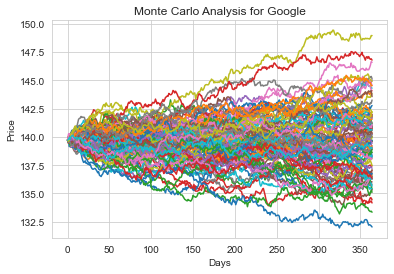

In [113]:
start_price = 139.712

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')

In [115]:
# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in range(runs):
    #Set simulation datapoint as the last stock price for that run
    simulations[run]=stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Now that we have our array of simulations, we can go ahead and plot a histogram ,as well as use qunatile to define our risk for this stock.

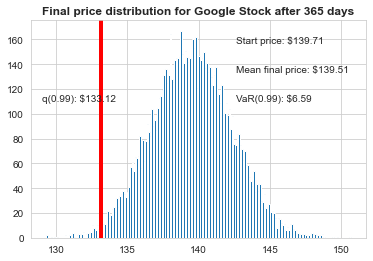

In [116]:
# Now we'lll define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');

We have looked at the 1% empirical quantile of the final price distribution to estimate the Value at Risk for the Google stock, which looks to be 6.59 for every investment of 139.714 (the price of one inital google stock).

This basically menas for every initial stock you purchase your putting about $18.38 at risk 99% of the time from our Monte Carlo Simulation.